In [78]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq
import scipy.signal as sig
%matplotlib inline

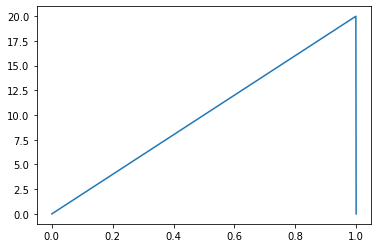

In [79]:
N = 1000
T = 1
dt = T/N
tf = T
VO = 10

t = np.linspace(0,tf,N)
V = VO*(sig.sawtooth(2*np.pi*t/T)+1)

plt.plot(t,V)

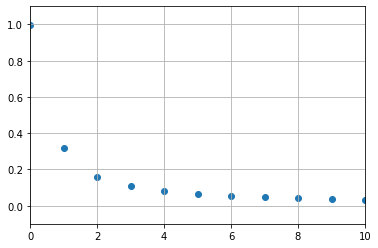

In [80]:
Vf = (1/(N*VO))*fft(V)[0:N//2]
freq = fftfreq(N,dt)[0:N//2]

plt.scatter(freq, np.abs(Vf))
plt.axis([0,10,-0.1,1.1])
plt.grid()

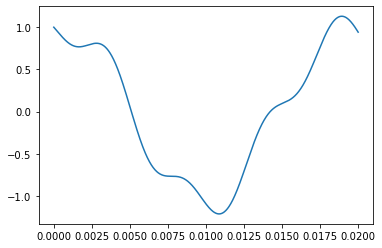

In [81]:
A = 1
B = 0.1
C = -0.2

fA = 50
fB = 80
fC = 200

T0 = 1/fA
N = 1000
dt = T0/N

t = np.linspace(0,T0,N)
V = A*np.cos(2*np.pi*fA*t)+B*np.sin(2*np.pi*fB*t)+C*np.sin(2*np.pi*fC*t)

plt.plot(t,V)


(0.0, 300.0, 0.0, 0.1)

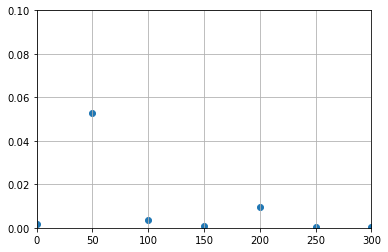

In [82]:
Vf = (1/(N*VO))*fft(V)
freq = fftfreq(N,dt)

plt.scatter(freq[0:N//2], np.abs(Vf[0:N//2]))
plt.grid()
plt.axis([0,300,0,0.1])

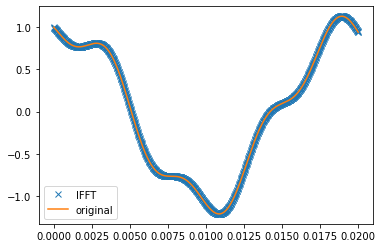

In [83]:
VApprox = ifft(N*VO*Vf)

plt.plot(t,VApprox, 'x', label='IFFT')
plt.plot(t,V, label='original')
plt.legend()

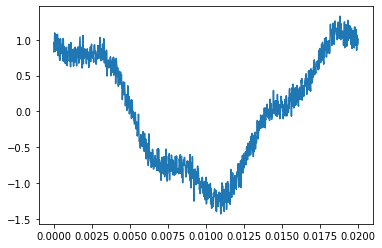

In [108]:
A = 1
B = 0.1
C = -0.2

## Zero centered noise
mu = 0
sigma = 0.1

fA = 50
fB = 80
fC = 200

T0 = 1/fA
N = 1000
dt = T0/N

t = np.linspace(0,T0,N)
Vdusty = A*np.cos(2*np.pi*fA*t)+B*np.sin(2*np.pi*fB*t)+C*np.sin(2*np.pi*fC*t)+np.random.normal(mu,sigma,len(t))

plt.plot(t,Vdusty)

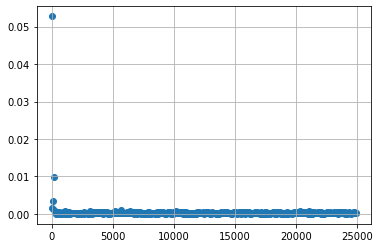

In [109]:
Vdustyf = (1/(N*VO))*fft(Vdusty)
freq = fftfreq(N,dt)

plt.scatter(freq[0:N//2], np.abs(Vdustyf[0:N//2]))
plt.grid()
#plt.axis([0,300,0,0.1])

(0.0, 1000.0, 0.0, 0.1)

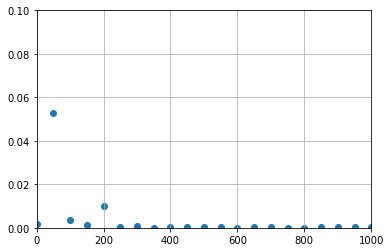

In [110]:
plt.scatter(freq[0:N//2], np.abs(Vdustyf[0:N//2]))
plt.grid()
plt.axis([0,1000,0,0.1])

(0.0, 1000.0, 0.0, 0.01)

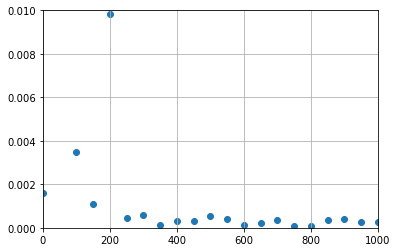

In [111]:
plt.scatter(freq[0:N//2], np.abs(Vdustyf[0:N//2]))
plt.grid()
plt.axis([0,1000,0,0.01])

400.0


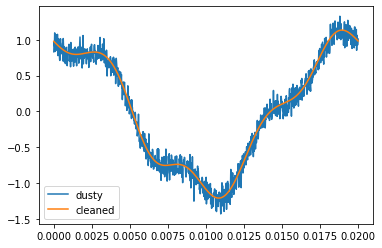

In [112]:
 

print(freq[8])
VCleanf = Vdustyf
VCleanf[8:] = 0

VClean = ifft(2*N*VO*VCleanf)

plt.plot(t,Vdusty, label='dusty')
plt.plot(t,VClean, label='cleaned')
plt.legend()


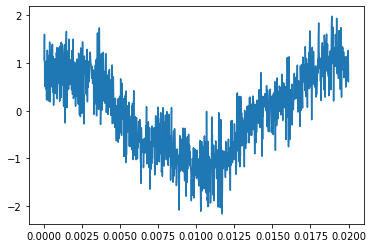

In [113]:
A = 1
B = 0.1
C = -0.2

## Zero centered noise
mu = 0
sigma = 0.4

fA = 50
fB = 80
fC = 200

T0 = 1/fA
N = 1000
dt = T0/N

t = np.linspace(0,T0,N)
Vdusty = A*np.cos(2*np.pi*fA*t)+B*np.sin(2*np.pi*fB*t)+C*np.sin(2*np.pi*fC*t)+np.random.normal(mu,sigma,len(t))

plt.plot(t,Vdusty)

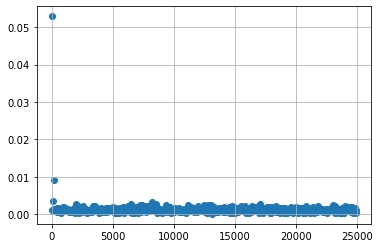

In [114]:
Vdustyf = (1/(N*VO))*fft(Vdusty)
freq = fftfreq(N,dt)

plt.scatter(freq[0:N//2], np.abs(Vdustyf[0:N//2]))
plt.grid()

(0.0, 2000.0, 0.0, 0.1)

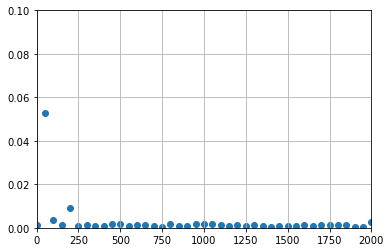

In [117]:
plt.scatter(freq[0:N//2], np.abs(Vdustyf[0:N//2]))
plt.grid()
plt.axis([0,2000,0,0.1])

(0.0, 2000.0, 0.0, 0.01)

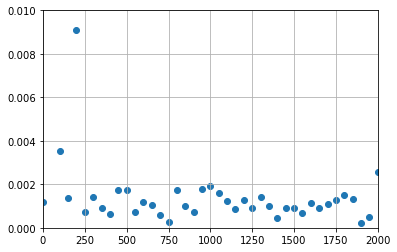

In [118]:
plt.scatter(freq[0:N//2], np.abs(Vdustyf[0:N//2]))
plt.grid()
plt.axis([0,2000,0,0.01])

400.0


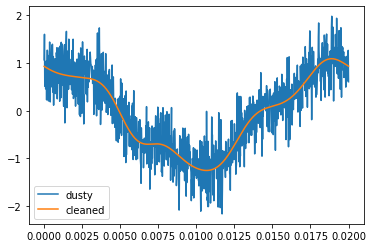

In [119]:
## Kill off anything above 400Hz

print(freq[8])
VCleanf = Vdustyf
VCleanf[8:] = 0

VClean = ifft(2*N*VO*VCleanf)

plt.plot(t,Vdusty, label='dusty')
plt.plot(t,VClean, label='cleaned')
plt.legend()

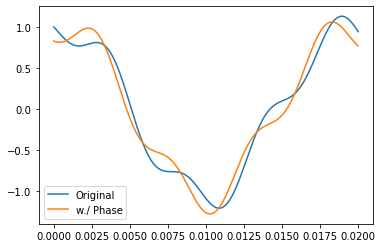

In [124]:
A = 1
B = 0.1
C = -0.2

fA = 50
fB = 80
fC = 200

phiA = 0
phiB = 0
phiC = np.pi/3

T0 = 1/fA
N = 1000
dt = T0/N

t = np.linspace(0,T0,N)
Voriginal = A*np.cos(2*np.pi*fA*t)+B*np.sin(2*np.pi*fB*t)+C*np.sin(2*np.pi*fC*t)
Vshifted = A*np.cos(2*np.pi*fA*t+phiA)+B*np.sin(2*np.pi*fB*t+phiB)+C*np.sin(2*np.pi*fC*t+phiC)

plt.plot(t,Voriginal, label='Original')
plt.plot(t,Vshifted, label='w./ Phase')
plt.legend()

(0.0, 1000.0, 0.0, 0.1)

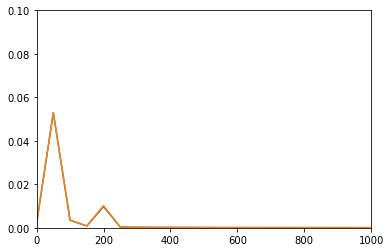

In [134]:
Voriginalf = (1/(N*VO))*fft(Voriginal)
Vshiftedf = (1/(N*VO))*fft(Vshifted)
freq = fftfreq(N,dt)

plt.plot(freq[0:N//2],np.abs(Voriginalf[0:N//2]))
plt.plot(freq[0:N//2],np.abs(Vshiftedf[0:N//2]))
plt.axis([0, 1000, 0, 0.1])

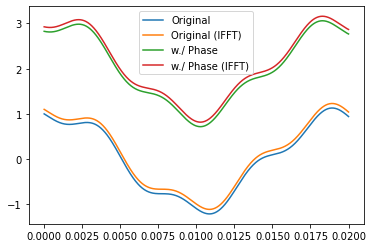

In [140]:
VOG = ifft(N*VO*Voriginalf)
VSH = ifft(N*VO*Vshiftedf)

plt.plot(t,Voriginal, label='Original')
plt.plot(t,VOG+0.1, label='Original (IFFT)')
plt.plot(t,Vshifted+2, label='w./ Phase')
plt.plot(t,VSH+2.1, label='w./ Phase (IFFT)')

plt.legend()